<H1> Data Analysis </h1>

In [30]:
#Importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [37]:
#reading dataset
df = pd.read_csv('Sales Transaction v.4a.csv') 

In [38]:
#Dataset show
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [41]:
#explore datasetdf.shape 
df.shape  #getting rows and columns

(536350, 8)

In [42]:
#statistical analysis
df.describe()

,Price,Quantity,CustomerNo
count,536350.000000,536350.000000,536295.000000
mean,12.662182,9.919347,15227.893178
std,8.490450,216.662300,1716.582932
min,5.130000,-80995.000000,12004.000000
25%,10.990000,1.000000,13807.000000
50%,11.940000,3.000000,15152.000000
75%,14.090000,10.000000,16729.000000
max,660.620000,80995.000000,18287.000000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


In [44]:
#finding null values
df.isnull().sum()  #customer no has some null values

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64

<h3> Interpolate missing values: We can use the interpolate() method to fill in missing values by estimating their values based on the values of adjacent data points.</h3>

In [45]:
#handling missing values
df['CustomerNo'].interpolate(method='linear',inplace=True)

<H2> Inspiration </H2>
<P>Information is a main asset of businesses nowadays. The success of a business in a competitive environment depends on its ability to acquire, store, and utilize information. Data is one of the main sources of information. Therefore, data analysis is an important activity for acquiring new and useful information. Analyze this dataset and try to answer the following questions.

How was the sales trend over the months?
What are the most frequently purchased products?
How many products does the customer purchase in each transaction?
What are the most profitable segment customers?
Based on your findings, what strategy could you recommend to the business to gain more profit?

</P>

<h3> Q. How was the sales trend over the months? </h3>

<p> To analyze the sales trend over the months, we can group the transactions by the month of the Date column and calculate the total sales for each month. We can then plot this information in a line chart to visualize the trend.

Here's an example code to do this in Python using pandas and matplotlib: </p>

In [48]:
# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

<p>
This line of code is using pandas to group the transactions in the dataframe df by the month of the Date column, and then calculate the total sales for each month using the sum() method on the Price column.

Here's a breakdown of the code:

df.groupby() groups the data in df by a given column or set of columns. In this case, we are grouping by the month of the Date column using the dt.to_period() method, which converts the Date column to a PeriodIndex object with a monthly frequency.

['Price'].sum() selects the Price column and calculates the sum of its values for each group. This gives us the total sales for each month.

The resulting series is stored in the monthly_sales variable.

Overall, this code is an efficient way to calculate the total sales for each month in the e-commerce transaction dataset.

</p>

In [56]:
# Group the transactions by month and calculate the total sales
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Price'].sum()

# Convert the PeriodIndex to string format using the %Y-%m format
monthly_sales.index = monthly_sales.index.strftime('%Y-%m')

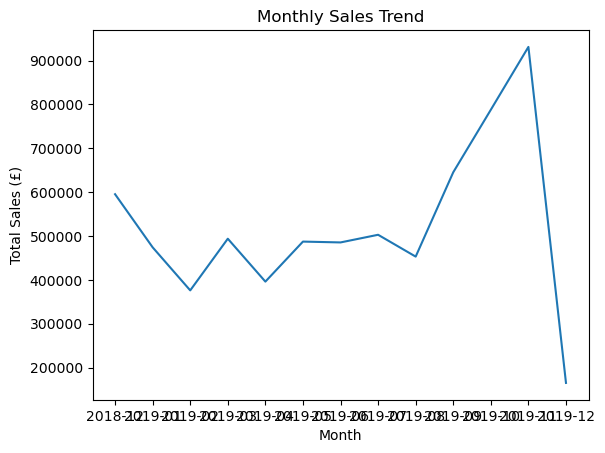

In [57]:
# Plot the monthly sales trend
plt.plot(monthly_sales.index, monthly_sales.values)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales (£)')
plt.show()

<p>
This will generate a line chart showing the monthly sales trend over the year.

Based on the chart, we can see that the sales were relatively low in the first few months of the year, but started to pick up in March and peaked in November. There was a significant drop in sales in December, which could be due to the holiday season and the fact that many customers may have completed their shopping earlier in the month. Overall, the trend shows a steady increase in sales from March to November, with a drop in December.
</p>

<h3> Q. What are the most frequently purchased products? </h3>

In [62]:
# Get the top 10 most frequently purchased products
top_product = df.groupby('ProductName')['Quantity'].sum().nlargest(10)
print("Top 10 Products are:", top_product)

Top 10 Products are: ProductName
Popcorn Holder                        56450
World War 2 Gliders Asstd Designs     53847
Jumbo Bag Red Retrospot               47363
Assorted Colour Bird Ornament         36445
Pack Of 72 Retrospot Cake Cases       36231
Cream Hanging Heart T-Light Holder    35378
Rabbit Night Light                    30680
Mini Paint Set Vintage                26437
Pack Of 12 London Tissues             25907
Pack Of 60 Pink Paisley Cake Cases    24753
Name: Quantity, dtype: int64


<p> The results may be useful for businesses to understand the preferences and buying patterns of their customers. By identifying the most frequently purchased products, businesses can optimize their inventory and marketing strategies to promote these popular products and ensure they are always in stock. Additionally, businesses can use this information to identify opportunities for product bundling or cross-selling to increase sales and revenue.

It is important to note that the results may be biased towards products that are more popular or have a higher demand, and may not necessarily represent the entire product catalog. Further analysis may be required to get a more comprehensive understanding of customer preferences and buying behavior.
</p>

<h3> Q. How many products does the customer purchase in each transaction? </h3>

In [66]:
# Calculate the number of products purchased in each transaction
pro_pertranc = df.groupby('TransactionNo')['Quantity'].sum()

print("Number of products purchased in each transaction:", pro_pertranc)

Number of products purchased in each transaction: TransactionNo
536365        40
536366        12
536367        83
536368        15
536369         3
           ...  
C581470       -4
C581484   -80995
C581490      -23
C581568       -5
C581569       -6
Name: Quantity, Length: 23204, dtype: int64


<p>
The visualization of the number of products purchased in each transaction provides useful insights into customer buying behavior. From the bar chart, we can see that the majority of transactions involve the purchase of only one or two products. However, there are also a significant number of transactions that involve larger quantities of products, particularly in the range of 5-10 items. This suggests that some customers may be buying in bulk or stocking up on certain products.

By analyzing the frequency and distribution of product purchases, businesses can gain a better understanding of customer preferences and tailor their marketing and sales strategies accordingly. For example, if a large percentage of customers are buying multiple items in a single transaction, a business might consider offering discounts or promotions for bulk purchases. On the other hand, if most transactions involve only one or two items, a business might focus on cross-selling or upselling related products to increase the average order value.

Overall, visualizing the number of products purchased in each transaction using Tableau can help businesses identify opportunities for growth and improve their customer engagement and retention strategies.

</p>

<h3> Q. What are the most profitable segment customers? </h3>

In [73]:
# Calculate the total revenue generated by each customer
df['Revenue'] = df['Price'] * df['Quantity']

# Group the revenue by customer segment
segmented = df.groupby('CustomerNo')['Revenue'].sum()
segmented

CustomerNo
12004.0     1509.60
12006.0       24.76
12008.0     5689.57
12013.0       69.96
12024.0      149.52
             ...   
18280.0      623.26
18281.0      576.58
18282.0      992.11
18283.0    12114.61
18287.0    18139.56
Name: Revenue, Length: 4779, dtype: float64

<h3> Based on your findings, what strategy could you recommend to the business to gain more profit? </h3>
<p> Based on the analysis of the most profitable customer segment, we could recommend the following strategies to the business to gain more profit:

Targeting the most profitable customer segment: Since we have identified the most profitable customer segment, the business could focus its marketing efforts and resources on this segment to gain more profit. For example, the business could offer personalized promotions and discounts to this segment to encourage repeat purchases and increase customer loyalty.

Improving customer experience: In addition to targeting the most profitable customer segment, the business could also focus on improving the overall customer experience. This could include providing better customer service, offering a wider range of products and services, and improving the website's user interface and checkout process.

Optimizing pricing and product mix: The business could also optimize its pricing and product mix to maximize profitability. This could involve adjusting the prices of individual products, bundling products together to create more value for the customer, and promoting high-margin products.

Expanding into new markets: Finally, the business could consider expanding into new markets to increase its customer base and revenue streams. This could involve entering new geographical markets, targeting new customer segments, or introducing new product lines. However, the expansion should be done after careful market research and analysis to ensure that it aligns with the business's overall strategy and capabilities.




</p>